# Ekstremi funkcija

## Lokalni ekstremi

**Definicija 1.** _Neka je $A \subseteq \mathbb{R^n}$ otvoren, $f: A\rightarrow \mathbb{R}$ i $c \in A.$_
- _Ako postoji okolina $U(c)$ na kojoj je $f(c)$ maksimum_
$( \forall x \in U(c) \hspace{3mm} f(c) \ge f(x) ),$
_kažemo da je $c$ **lokalni maksimum**, a $f(c)$ je vrijednost lokalnog maksimuma._
- _Ako postoji okolina $U(c)$ na kojoj je $f(c)$ minimum_
$(\forall x \in U(c) \hspace{3mm} f(c) \le f(x)),$
_kažemo da je $c$ **lokalni minimum**, a $f(c)$ je vrijednost lokalnog minimuma._
- _$c$ je **lokalni ekstrem** ako je lokalni minimum ili lokalni minimum funkcije $f$._

- _$c$ je **stacionarna točka** ako je funkcija $f$ diferencijabilna u $c$ i $Df(c) = 0$_

**Lokalni maksimum:**

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import math
%matplotlib agg

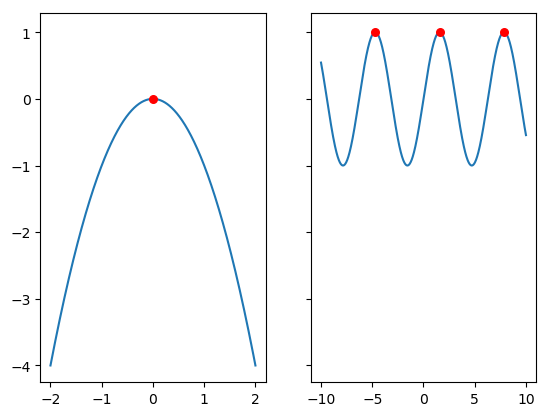

In [6]:
%matplotlib agg
fig, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x = np.linspace(-2, 2, 1000)
lijevo.plot(x, -x**2,zorder=1)
lijevo.scatter(0, 0, s=30, c='r', zorder=2)

x = np.linspace(-10, 10, 1000)
desno.plot(x, np.sin(x), zorder=1)
X=[math.pi/2, math.pi/2 + 2*math.pi, math.pi/2 - 2*math.pi]
Y=[1, 1, 1]
desno.scatter(X, Y, s=30, c='r', zorder=2)

fig

**Lokalni minimum:**

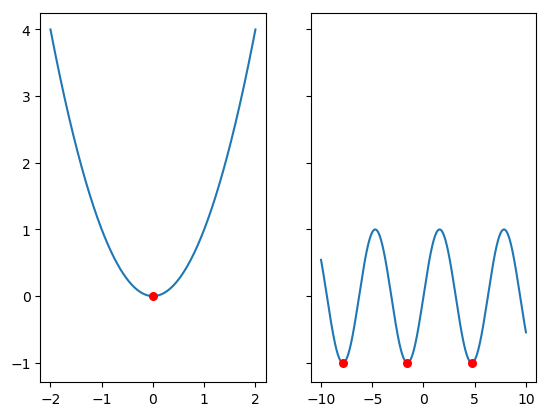

In [7]:
%matplotlib agg
fig, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x = np.linspace(-2, 2, 1000)
lijevo.plot(x, x**2, zorder=1)
lijevo.scatter(0, 0, s=30, c='r', zorder=2)

x = np.linspace(-10, 10, 1000)
desno.plot(x, np.sin(x), zorder=1)
X=[-math.pi/2, -math.pi/2 + 2*math.pi, -math.pi/2 - 2*math.pi]
Y=[-1, -1, -1]
desno.scatter(X, Y, s=30, c='r', zorder=2)

fig

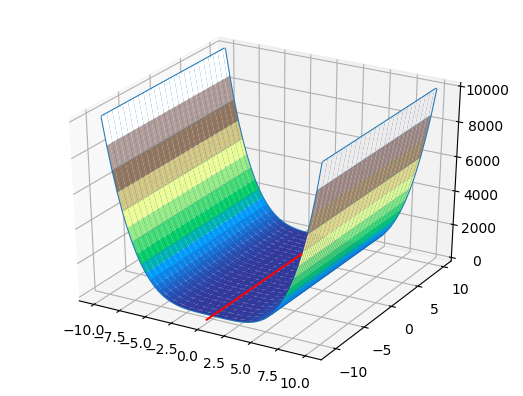

In [8]:
%matplotlib agg
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = x**4
ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
ax.plot_surface(x, y, z, cmap='terrain', linewidth=1)

ax2 = fig.gca(projection='3d')
y = np.linspace(-11, 5.5, 100)
x = 0 * y
z = 0 
ax2.plot(x, y, z, c='r')

fig

**Teorem 2. (Nužan uvjet za lokalni ekstrem)** _Neka je $A \subseteq \mathbb{R^n}$ otvoren i $f: A\rightarrow \mathbb{R}$ diferencijabilna u $c \in A$. Ako je $c$ lokalni ekstrem funkcije $f$ onda je $Df(c)=0$ (tj. $c$ je stacionarna točka funkcije $f$)._

**Teorem 3. (Dovoljni uvjeti za lokalni ekstrem)** _Neka je $A \subseteq \mathbb{R^n}$ otvoren i $f: A\rightarrow \mathbb{R}$ klase $C^2$._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je negativno definitna matrica onda $f$ ima lokalni maksimum u $c$._
- _Ako $f$ ima lokalni maksimum u $c$ onda je $H_f(c)$ negativno semidefinitna._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je pozitivno definitna matrica onda $f$ ima lokalni minimum u $c$._
- _Ako $f$ ima lokalni minimum u $c$ onda je $H_f(c)$ pozitivno semidefinitna._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je indefinitna matrica onda $f$ nema u točki $c$ lokalni ekstrem, tj. $c$ je sedlasta točka funkcije $f$._

Prethodna dva teorema nam daju način **kako analitički odrediti lokalne ekstreme** neke funkcije:
1. Odredimo sve točke $c \in A$ takve da $Df(c)=0$. Po Teoremu 2. one su kandidati za lokalne ekstreme.
2. Za njih izračunamo $H_f(c)$.
3. Iskoristimo Teorem 3.

In [9]:
import sympy as sp
import numpy as np

def grad(f,var):
    return [sp.diff(f,x) for x in var]

def hess(f,var):
    return sp.Matrix([[f.diff(x).diff(y) for x in var] for y in var])

x,y = sp.symbols('x y')

def f(x,y):
    return x**2 + y**2

fsp = f(x,y)

Možemo izračunati gradijent i Hessian u nekoj točki, npr. u točki $(1,1)$ da vidimo je li u njoj lokalni ekstrem. Po obratu po kontrapoziciji Teorema 2 znamo da u $(1,1)$ nije lokalni ekstrem funkcije $f(x,y)=x^2+y^2$ jer $Df(1,1)=(2,2)$

In [10]:
[i.n(5, subs={x: 1, y: 1}) for i in grad(fsp,[x,y])]    # evaluacija gradijenta u (1,1)

[2.0000, 2.0000]

**Primjer 4.** Nađimo lokalne ekstreme funkcije $f(x,y)=x^2+y^2$.

In [11]:
def f(x,y):
    return x**2 + y**2

fsp = f(x,y)

g = grad(fsp,[x,y])
print("Gradijent funkcije f je: ",g)

stac_tocka = sp.solve(g, sp.symbols('x y'))
print("Stacionarne točke: ", stac_tocka)

Gradijent funkcije f je:  [2*x, 2*y]
Stacionarne točke:  {y: 0, x: 0}


Jedini kandidat je točka $(0,0)$.

In [12]:
h = hess(fsp,[x,y])
print("Hessian funkcije f:")
h   # ovisi o x i y

Hessian funkcije f:


Matrix([
[2, 0],
[0, 2]])

In [13]:
temp = h.eigenvals()
print("Svojstvene vrijednosti:", temp)

Svojstvene vrijednosti: {2: 2}


In [14]:
def is_pos_def(d):
    for key in d:
        if key <= 0:
            return False
    return True

is_pos_def(temp)

True

Vidimo da je $H_f(0,0)$ pozitivno definitna pa po Teoremu 3. zaključujemo da funkcija $f$ u $(0,0)$ ima lokalni minimum. Sljedeći graf potvrđuje naš nalaz.

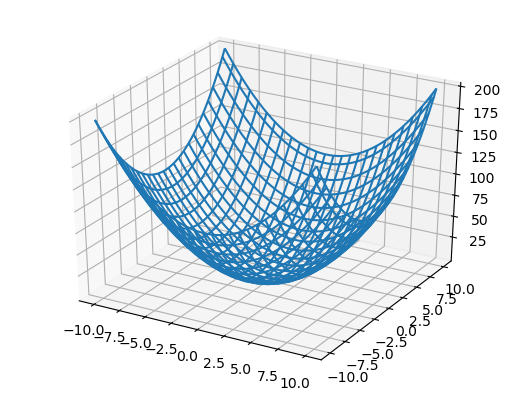

In [15]:
%matplotlib agg
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = f(x,y)

ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
fig

**Primjer 5.** Nađimo lokalne ekstreme funkcije $f(x,y)=-(x-2)^2-(y+1)^2$.

In [16]:
x,y = sp.symbols('x y')

def f(x,y):
    return -(x-2)**2 - (y+1)**2

fsp = f(x,y)

g = grad(fsp,[x,y])
print("Gradijent funkcije f je:",g)

stac_tocka = sp.solve(g, sp.symbols('x y'))
print("Stacionarne točke:", stac_tocka)

Gradijent funkcije f je: [-2*x + 4, -2*y - 2]
Stacionarne točke: {x: 2, y: -1}


Jedini kandidat je točka $(2,-1)$.

In [17]:
h = hess(fsp,[x,y])
h    # ovisi o x i y

Matrix([
[-2,  0],
[ 0, -2]])

In [18]:
Delta1 = sp.lambdify((x,y),h[0,0])
print("Delta1:", Delta1(2,-1))

temp = h.det()
Delta2 = sp.lambdify((x,y),temp)
print("Delta2:", Delta2(2,-1))

Delta1: -2
Delta2: 4


Koristimo **Sylvesterov kriterij**. U našem slučaju:
$$\Delta _1 = h_1 = -2 < 0$$
$$\Delta _2 = det(H_f(2,-1)) = 4 > 0$$

Zaključujemo da je $H_f(2,-1)$ negativno definitna pa iz Teorema 3. slijedi da funkcija $f$ u $(2,-1)$ ima lokalni maksimum.

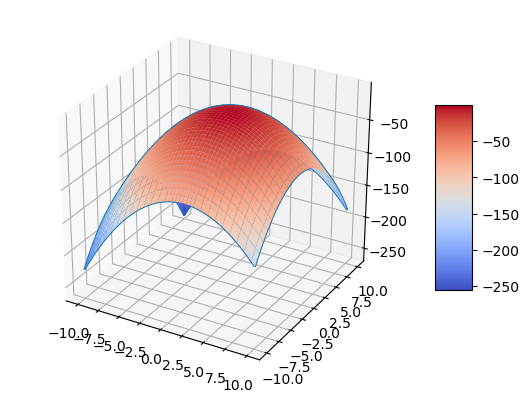

In [19]:
%matplotlib agg
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = f(x,y)
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=1)

fig

**Primjer 6.** Nađimo lokalne ekstreme funkcije $f(x,y,z,w) = 5(x-3)^3 + 9(y-2)^2 - 9(z+3)^3 - 11(w+2)^2$.

In [20]:
x,y,z,w = sp.symbols('x y z w')

def f(x,y,z,w):
    return 5*(x-3)**2 + 9*(y-2)**2 - 9*(z+3)**3 - 11*(w+2)**2

fsp = f(x,y,z,w)

g = grad(fsp,[x,y,z,w])
print("Gradijent funkcije f je:",g)

stac_tocka = sp.solve(g, sp.symbols('x y z w'))
print("Stacionarne točke:", stac_tocka)

Gradijent funkcije f je: [10*x - 30, 18*y - 36, -27*(z + 3)**2, -22*w - 44]
Stacionarne točke: [(3, 2, -3, -2)]


Jedini kandidat je točka $(3, 2, -3, -2)$.

In [21]:
h = hess(fsp,[x,y,z,w])
h    # ovisi o x i y

Matrix([
[10,  0,           0,   0],
[ 0, 18,           0,   0],
[ 0,  0, -54*z - 162,   0],
[ 0,  0,           0, -22]])

In [22]:
Delta1 = sp.lambdify((x,y,z,w),h[0,0])
print("Delta1:", Delta1(3,2,-3,-2))

temp = h[0:2,0:2].det()
Delta2 = sp.lambdify((x,y,z,w),temp)
print("Delta2:", Delta2(3,2,-3,-2))

temp = h[0:3,0:3].det()
Delta3 = sp.lambdify((x,y,z,w),temp)
print("Delta3:", Delta3(3,2,-3,-2))

temp = h.det()
Delta4 = sp.lambdify((x,y,z,w),temp)
print("Delta4:", Delta4(3,2,-3,-2))

Delta1: 10
Delta2: 180
Delta3: 0
Delta4: 0


Imamo: $$\Delta _1 = 10 > 0$$
       $$\Delta _2 = 180 > 0$$
       $$\Delta _3 = 0 \ge 0$$
       $$\Delta _4 = 0 \ge 0$$
       
Slijedi da je $H_f(3,2,-3,2)$ pozitivno semidefinitna.

U $(3,2,-3,2)$ može biti lokalni minimum ili sedlasta točka.

### Gradijentna metoda

**Algoritam** (tražimo lokalni **minimum**):

- $x \gets$ slučajno odabrani vektor
- **ponavljaj**:
- $x \gets (x - \lambda \nabla f(x))$
- **sve dok** nije ispunjen uvjet zaustavljanja
- **vrati $x$**

Napomena: Za maksimum bi bilo $x \gets (x + \lambda \nabla f(x))$.

In [44]:
def grad_met(f, var, lamda, aproks):
    lista = [aproks]
    for i in range(1000):
        temp = np.asarray(sp.lambdify(var,grad(f,var))(aproks[0], aproks[1]))
        new = aproks - lamda * temp
        if np.linalg.norm(aproks - new) < 10**-10:
            return new, lista
        aproks = new
        lista.append(np.ndarray.tolist(aproks))
    return aproks, lista

**Primjer 8.** Iskoristimo gradijentnu metodu na funkciji $f(x,y) = x^2 + y^2$ s inicijalnom aproksimacijom $(80,100)$ i $\lambda = 0.1$

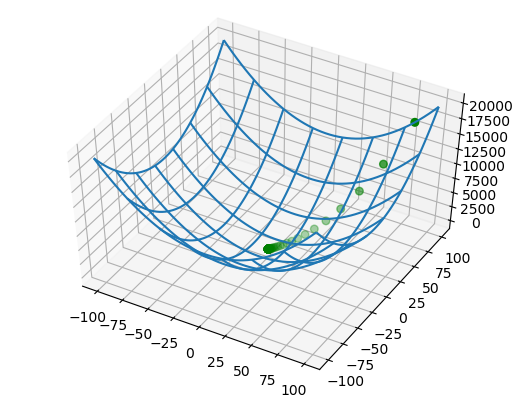

In [45]:
x,y = sp.symbols('x y')

def f(x,y):
    return x**2 + y**2

fsp = f(x,y)

aproks, history = grad_met(fsp, [x,y], 0.1, [80,100])

for el in history:
    el.extend([f(el[0],el[1])])

X = []
Y = []
Z = []
for el in history:
    X.extend([el[0]])
    Y.extend([el[1]])
    Z.extend([el[2]])

%matplotlib agg  
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-100, 100), np.linspace(-100, 100))
z = f(x,y)
ax.plot_wireframe(x, y, z, rstride=7, cstride=7, zorder=-100)
ax.scatter(X, Y, Z, s=30, c='g', zorder=1000000)
ax.view_init(elev=50)
fig

Mane gradijentne metode su to što može biti spora, što ćemo vidjeti na istom ovom primjeru, kada stavimo $\lambda = 0.0001$.

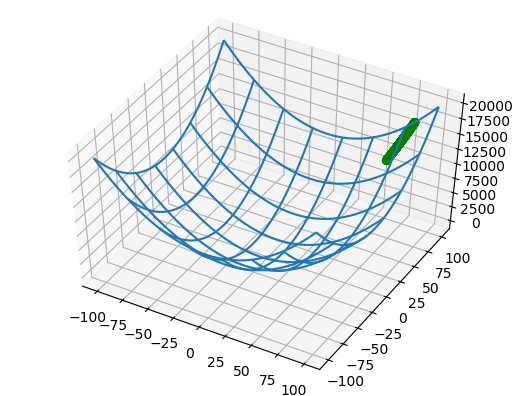

In [26]:
x,y = sp.symbols('x y')

def f(x,y):
    return x**2 + y**2

fsp = f(x,y)

aproks, history = grad_met2D(fsp, [x,y], 0.0001, [80,100])

for el in history:
    el.extend([f(el[0],el[1])])
    
X = []
Y = []
Z = []
for el in history:
    X.extend([el[0]])
    Y.extend([el[1]])
    Z.extend([el[2]])

%matplotlib agg
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-100, 100), np.linspace(-100, 100))
z = f(x,y)
ax.plot_wireframe(x, y, z, rstride=7, cstride=7, zorder=-100)
ax.scatter(X, Y, Z, s=30, c='g', zorder=1000000)
#ax.view_init(elev=30,azim=200)
ax.view_init(elev=50)
fig

S druge strane, ona može divergirati čak i na konveksnim funkcijama ako stavimo prevelik $\lambda$. Na ovom primjeru npr. $\lambda = 1.1$

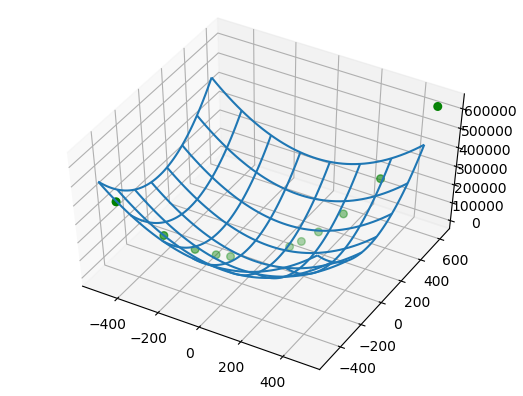

In [46]:
def grad_met(f, var, lamda, aproks):
    lista = [aproks]
    for i in range(10):  # Ovo moramo promijeniti jer bismo dobili overflow da stavimo 1000 iteracija.
        temp = np.asarray(sp.lambdify(var,grad(f,var))(aproks[0], aproks[1]))
        new = aproks - lamda * temp
        if np.linalg.norm(aproks - new) < 10**-10:
            return new, lista
        aproks = new
        lista.append(np.ndarray.tolist(aproks))
    return aproks, lista

x,y = sp.symbols('x y')

def f(x,y):
    return x**2 + y**2

fsp = f(x,y)

aproks, history = grad_met(fsp, [x,y], 1.1, [80,100])

for el in history:
    el.extend([f(el[0],el[1])])
    
X = []
Y = []
Z = []
for el in history:
    X.extend([el[0]])
    Y.extend([el[1]])
    Z.extend([el[2]])

%matplotlib agg
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-500, 500), np.linspace(-500, 500))
z = f(x,y)
ax.plot_wireframe(x, y, z, rstride=7, cstride=7, zorder=-100)
ax.scatter(X, Y, Z, s=30, c='g', zorder=1000000)
ax.view_init(elev=50)
fig

### Newtonova metoda

**Algoritam** (tražimo lokalni **minimum**):

- $x \gets$ slučajno odabrani vektor
- **ponavljaj**:
- $x \gets (x - H_f(x)^{-1}  \nabla f(x))$
- **sve dok** nije ispunjen uvjet zaustavljanja
- **vrati $x$**

Napomena: Za maksimum bi bilo $x \gets (x + H_f(x)^{-1}  \nabla f(x))$.

In [40]:
def newton(f, var, aproks):
    lista = [aproks]
    for i in range(1000):
        temp = hess(f,var).inv()*sp.Matrix(grad(f,var))
        temp2 = np.asarray(sp.lambdify(var,temp)(aproks[0], aproks[1])).flatten()
        new = aproks - temp2
        if np.linalg.norm(aproks - new) < 10**-10:
            return new, lista
        aproks = new
        lista.append(np.ndarray.tolist(aproks))
    return aproks, lista    

Aproksimacije: [[0.5, 2], [-0.33333333333333326, 0.0], [0.08333333333333331, 0.0], [-0.0011655011655011677, 0.0], [3.166421473329087e-09, 0.0], [0.0, 0.0]]


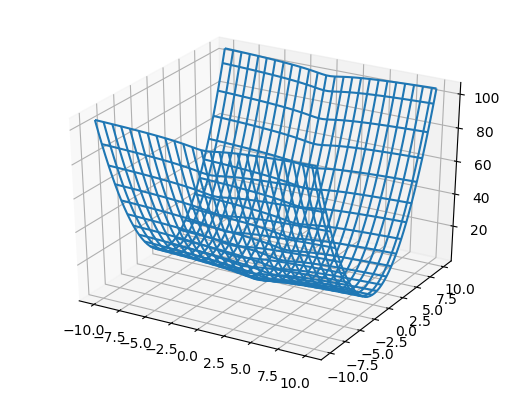

In [55]:
x,y = sp.symbols('x y')
def f(x,y):
    return sp.log(1+x**2) + y**2

fsp = f(x,y)

aproks, history = newton(fsp, [x,y], [0.5,2])
print("Aproksimacije:", history)

for el in history:
    el.extend([f(el[0],el[1])])
    
X = []
Y = []
Z = []
for el in history:
    X.extend([el[0]])
    Y.extend([el[1]])
    Z.extend([el[2]])

x,y = sp.symbols('x y')
def f(x,y):
    return sp.log(1+x**2) + y**2

%matplotlib agg
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = np.log(1+x**2) + y**2

ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
#ax.scatter(X, Y, Z)#, s=30, c='g', zorder=1000000)
fig